In [42]:
import pandas as pd
import textblob 
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv("data.csv")
productDF = df[df["id"] == "AVphgVaX1cnluZ0-DR74"] #chosing a product
productDF.head(3)

C:\Users\janaa\AppData\Local\Temp\ipykernel_26304\2063561842.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
3695,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,"Good basic tablet for checking email , web bro...",Good,NaN,NaN,Jacques
3696,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,I love this tablet. It was a great buy. I woul...,Great tablet!,NaN,NaN,resolution516
3697,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,"Brought my old tablet in to my local store, an...",Good tablet for a low price.,NaN,NaN,AvatarRei


In [44]:
def sentimentAnalyzer(text):
    blob = textblob.TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity < -0.2:
        return "negative"
    elif polarity > 0.2:
        return "positive"
    else:
        return "neutral"


def verifyTest():
    assert sentimentAnalyzer("Happy") == "positive"
    assert sentimentAnalyzer("Exciting") == "positive"
    assert sentimentAnalyzer("good") == "positive"
    assert sentimentAnalyzer("rich") == "positive"
    assert sentimentAnalyzer("smile") == "positive"

    assert sentimentAnalyzer("Sad") == "negative"
    assert sentimentAnalyzer("disappointed") == "negative"
    assert sentimentAnalyzer("bad") == "negative"
    assert sentimentAnalyzer("poor") == "negative"
    assert sentimentAnalyzer("anger") == "negative"

    assert sentimentAnalyzer("food") == "neutral"
    assert sentimentAnalyzer("animal") == "neutral"

    print("All tests passed")


verifyTest()

All tests passed


In [45]:
productDF = productDF.drop(["categories", "asins", "keys", "manufacturer", "reviews.date", "reviews.dateAdded",
                            "reviews.dateSeen", "reviews.didPurchase", "reviews.doRecommend", "reviews.id",
                            "reviews.numHelpful", "reviews.sourceURLs",
                            "reviews.userCity", "reviews.userProvince", "reviews.username", "id"], axis=1)
productDF.head()

,name,brand,reviews.rating,reviews.text,reviews.title
3695,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,4.0,"Good basic tablet for checking email , web bro...",Good
3696,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,5.0,I love this tablet. It was a great buy. I woul...,Great tablet!
3697,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,5.0,"Brought my old tablet in to my local store, an...",Good tablet for a low price.
3698,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,4.0,Good Inexpensive tablet for someone that does ...,Good tablet for a beginner
3699,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,4.0,I got this for my niece. I would say this prod...,Great for kids


In [46]:
print("Product Name: " + productDF["name"][3695])
print("Number of columns: " + str(len(productDF.columns)))
print("Number of rows: " + str(len(productDF.index)))
print("Length of shortest review: " + str(len(min(productDF["reviews.text"], key=len))))
productDF.describe()

Product Name: Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta
Number of columns: 5
Number of rows: 10966
Length of shortest review: 6


,reviews.rating
count,10966.000000
mean,4.454222
std,0.801874
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [47]:
productDF["sentiment"] = productDF["reviews.text"].apply(sentimentAnalyzer)
productDF.head()

,name,brand,reviews.rating,reviews.text,reviews.title,sentiment
3695,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,4.0,"Good basic tablet for checking email , web bro...",Good,positive
3696,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,5.0,I love this tablet. It was a great buy. I woul...,Great tablet!,positive
3697,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,5.0,"Brought my old tablet in to my local store, an...",Good tablet for a low price.,positive
3698,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,4.0,Good Inexpensive tablet for someone that does ...,Good tablet for a beginner,positive
3699,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,4.0,I got this for my niece. I would say this prod...,Great for kids,positive


In [48]:
productDF.head(20)

,name,brand,reviews.rating,reviews.text,reviews.title,sentiment
3695,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,4.0,"Good basic tablet for checking email , web bro...",Good,positive
3696,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,5.0,I love this tablet. It was a great buy. I woul...,Great tablet!,positive
3697,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,5.0,"Brought my old tablet in to my local store, an...",Good tablet for a low price.,positive
3698,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,4.0,Good Inexpensive tablet for someone that does ...,Good tablet for a beginner,positive
3699,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,4.0,I got this for my niece. I would say this prod...,Great for kids,positive
3700,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,5.0,A great product for my kids and great learning...,Good for grade school,positive
3701,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,5.0,Purchased for my toddler. Best investment yet....,Great tablet for all ages,positive
3702,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,3.0,Buying this device I thought it could replace ...,Lack usability,positive
3703,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,5.0,This is a great tablet for us seniors because ...,Great tablet for seniors,positive
3704,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,5.0,Nice tablet for the price. Got it for my son B...,Nice tablet,positive


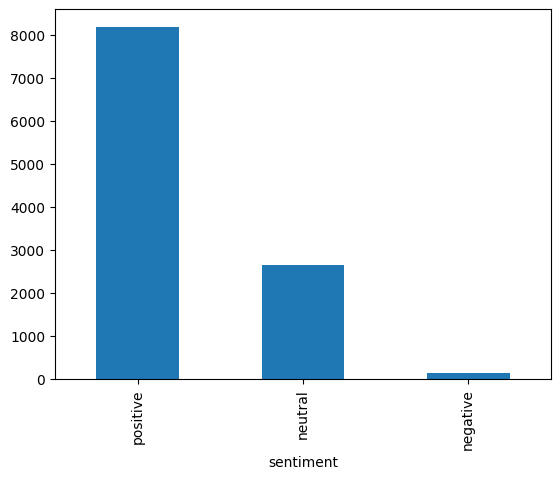

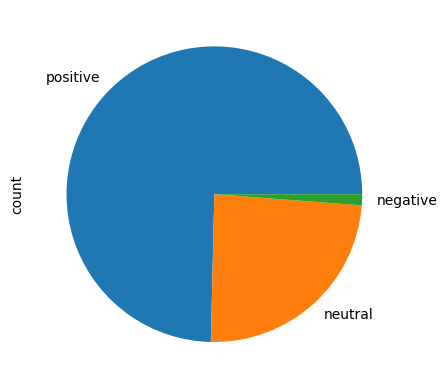

In [49]:
# Bar graph
productDF["sentiment"].value_counts().plot(kind="bar")
plt.show()

# Pie graph
productDF["sentiment"].value_counts().plot(kind="pie")
plt.show()


In [50]:
print("Positive reviews:")
productDF[productDF["sentiment"] == "positive"].head()

Positive reviews:


,name,brand,reviews.rating,reviews.text,reviews.title,sentiment
3695,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,4.0,"Good basic tablet for checking email , web bro...",Good,positive
3696,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,5.0,I love this tablet. It was a great buy. I woul...,Great tablet!,positive
3697,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,5.0,"Brought my old tablet in to my local store, an...",Good tablet for a low price.,positive
3698,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,4.0,Good Inexpensive tablet for someone that does ...,Good tablet for a beginner,positive
3699,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,4.0,I got this for my niece. I would say this prod...,Great for kids,positive


In [53]:
print("negaitive reviews:")
productDF[productDF["sentiment"] == "negative"].head()

negaitive reviews:


,name,brand,reviews.rating,reviews.text,reviews.title,sentiment
3879,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,3.0,the description sounded like the base unit was...,online description was misleading,negative
3969,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,2.0,Pro's GPS accurate--easy to set-upCons small s...,vivosmart hr + undesireable,negative
4102,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,1.0,I can't get my tablet to set the time so I hav...,Wish it had instructions,negative
4148,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,5.0,Seems to be sturdy and lite weight for small h...,Good quality for a child,negative
4273,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,4.0,For the price tag of $59 bucks u can't go wron...,Price is right,negative


In [54]:
print("neutral reviews:")
productDF[productDF["sentiment"] == "neutral"].head()

neutral reviews:


,name,brand,reviews.rating,reviews.text,reviews.title,sentiment
3713,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,5.0,Easy enough for a 5 year old to use and with t...,Great tablet for my great-grandson,neutral
3717,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,5.0,this is just as good as a laptop of ipad why w...,my tab,neutral
3726,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,4.0,Small enough to carry and works fast enough fo...,easy tablet to use,neutral
3727,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,4.0,Bought for my 6 yr old autistic grandson. So f...,Great tablet for a beginner,neutral
3733,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,5.0,For it being a Amazon tablet it does everythin...,Awesome Tablet,neutral


In [61]:
# Print some insights
print("Number of positive reviews: " + str(len(productDF[productDF["sentiment"] == "positive"])))
print("Number of negative reviews: " + str(len(productDF[productDF["sentiment"] == "negative"])))
print("Number of neutral reviews: " + str(len(productDF[productDF["sentiment"] == "neutral"])))
print("---------------------------------------------------------------------------")
print("Average polarity of positive reviews: " + str(productDF[productDF["sentiment"] == "positive"]["reviews.text"].apply(lambda x: textblob.TextBlob(x).sentiment.polarity).mean()))
print("Average polarity of negative reviews: " + str(productDF[productDF["sentiment"] == "negative"]["reviews.text"].apply(lambda x: textblob.TextBlob(x).sentiment.polarity).mean()))
print("---------------------------------------------------------------------------")
print("Average length of positive reviews: " + str(productDF[productDF["sentiment"] == "positive"]["reviews.text"].apply(len).mean()))
print("Average length of negative reviews: " + str(productDF[productDF["sentiment"] == "negative"]["reviews.text"].apply(len).mean()))

Number of positive reviews: 8183
Number of negative reviews: 132
Number of neutral reviews: 2651
---------------------------------------------------------------------------
Average polarity of positive reviews: 0.5057258188941939
Average polarity of negative reviews: -0.37181251847592994
---------------------------------------------------------------------------
Average length of positive reviews: 134.70255407552241
Average length of negative reviews: 117.5


In [67]:
# Find examples where rating is more than 4 but sentiment is negative
falseNegative = productDF[(productDF["reviews.rating"] > 4) & (productDF["sentiment"] == "negative")]

# Find examples where rating is less than 3 but sentiment is positive
falsePositive = productDF[(productDF["reviews.rating"] < 3) & (productDF["sentiment"] == "positive")]

# reset indicies
falseNegative = falseNegative.reset_index(drop=True)
falsePositive = falsePositive.reset_index(drop=True)

falsePositive.head()

,name,brand,reviews.rating,reviews.text,reviews.title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,1.0,This device is OK for reading or listening to ...,Extremely slow,positive
1,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,2.0,this was just ok... wish the camera quality wa...,ok,positive
2,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,2.0,Item was bought as a gift I haven't used the d...,Ok,positive
3,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,2.0,Best tablet and most affortable. Love that it ...,Very affortable and perfect from Prime.,positive
4,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,2.0,Clunky and full of ads. Ok for my kids to use ...,Ok for kids,positive


In [68]:
falseNegative.head()

,name,brand,reviews.rating,reviews.text,reviews.title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,5.0,Seems to be sturdy and lite weight for small h...,Good quality for a child,negative
1,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,5.0,a $50 dollar tablet that will do more than an ...,Can't Beat the price!,negative
2,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,5.0,No reason to shop around at this price there i...,Some thing for everybody,negative
3,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,5.0,Lot's of entertainment content game apps movie...,Lot's of content to access,negative
4,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,5.0,Does what it says it does and is small and con...,Great Tablet for streaming and Browsing,negative


In [69]:
print("Number of false positives: " + str(len(falsePositive)))
print("Number of false negatives: " + str(len(falseNegative)))
print("---------------------------------------------------------------------------")
print("Average polarity of false positives: " + str(falsePositive["reviews.text"].apply(lambda x: textblob.TextBlob(x).sentiment.polarity).mean()))
print("Average polarity of false negatives: " + str(falseNegative["reviews.text"].apply(lambda x: textblob.TextBlob(x).sentiment.polarity).mean()))
print("---------------------------------------------------------------------------")
print("Average length of false positives: " + str(falsePositive["reviews.text"].apply(len).mean()))
print("Average length of false negatives: " + str(falseNegative["reviews.text"].apply(len).mean()))

Number of false positives: 96
Number of false negatives: 33
---------------------------------------------------------------------------
Average polarity of false positives: 0.41019441654988525
Average polarity of false negatives: -0.3681338120791246
---------------------------------------------------------------------------
Average length of false positives: 196.82291666666666
Average length of false negatives: 92.15151515151516


In [70]:
productDF.to_csv("product.csv")